In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [62]:
# Reading the csv file.
df=pd.read_csv('Skyserver.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


# From the above statistics
1. Class is the only column of type as  object which need to transform as part of target variable.
2. Also column rerun has single value 301 which is not useful and hence this can be dropped from the dataset.

In [64]:
# Dropping rerun column.
df.drop(['rerun'], axis=1, inplace=True)

In [65]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [66]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

fiberid      0
z            0
ra           0
dec          0
u            0
g            0
r            0
i            0
run          0
mjd          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
objid        0
dtype: int64

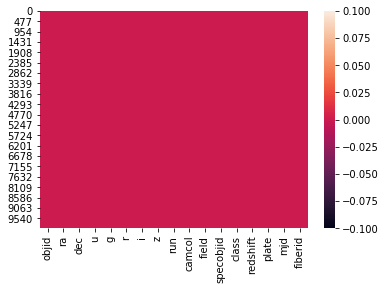

In [67]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [68]:
# Encoding columns as part of transformation.

from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

#df = le.fit_transform(df0)
df['class'] = le.fit_transform(df['class'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   camcol     10000 non-null  int64  
 10  field      10000 non-null  int64  
 11  specobjid  10000 non-null  float64
 12  class      10000 non-null  int32  
 13  redshift   10000 non-null  float64
 14  plate      10000 non-null  int64  
 15  mjd        10000 non-null  int64  
 16  fiberid    10000 non-null  int64  
dtypes: float64(10), int32(1), int64(6)
memory usage: 1.3 MB


In [70]:
# Checking the zscore in order to normalize the data.

from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[       nan, 0.16745842, 0.58492272, ..., 1.03148936, 1.30931064,
        0.66863177],
       [       nan, 0.16886159, 0.58311429, ..., 0.63621258, 0.87919741,
        0.91101156],
       [       nan, 0.17057433, 0.58347525, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [       nan, 0.92039468, 1.46090664, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [       nan, 0.92197294, 1.46432109, ..., 0.56688806, 0.70581092,
        0.60143828],
       [       nan, 0.91804124, 1.46639319, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [71]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([13, 13, 13, ..., 14, 11, 14], dtype=int64))


In [72]:
# Removing the outliers having zscore value of more than 3.
data=df[(z<3).all(axis=1)]
data

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid


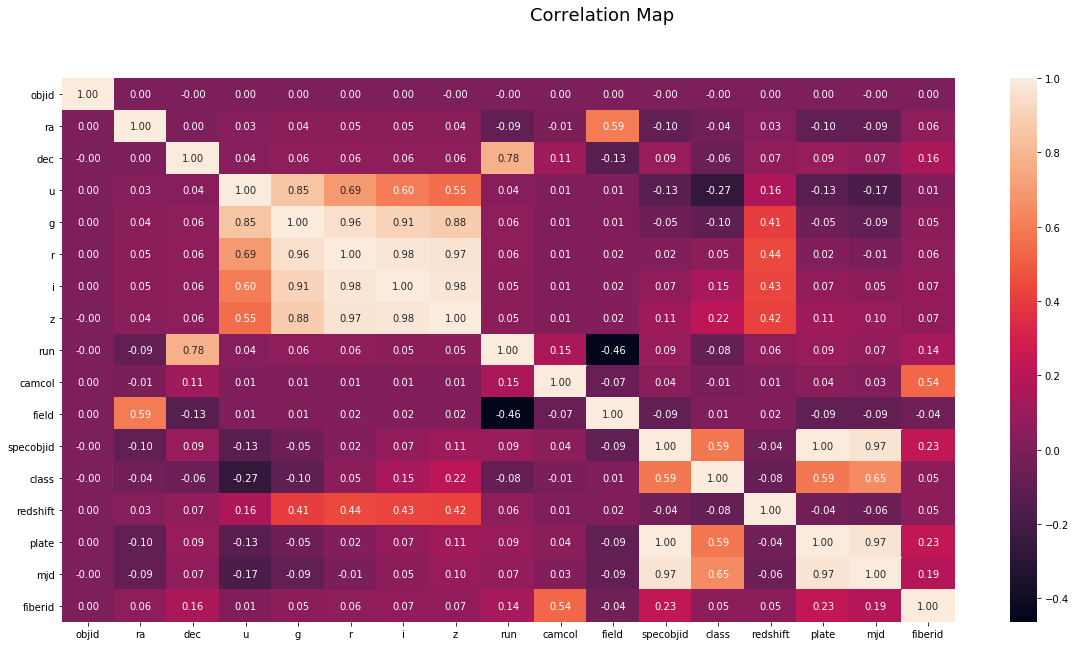

In [73]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

# Correlation Status

    1. Based on the correlation map the Loan_Status\ is related to only Credit_History.
    2. Also Loan Amount is related to Applicant's income.
    3. Self_Employed, Dependents, Applicantincome does not correlate much with Loan_Status which can be dropped.

In [74]:
# Checking for skewed data
df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [75]:
# Setting x  by excluding AveragePrice column which is y here for prediction.
x=df.drop(['class'],axis=1)
x

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
#scale = MinMaxScaler()
x=scale.fit_transform(x)

In [77]:
# Settng Y

y=df['class']
y

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [78]:
max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    #print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)




Max_accuracy_Score corresponding to final_r_state:  57  is  0.9816


In [79]:
# Setting the test x & y values and using the random state from above step which is 66.
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=66)

In [80]:
train_x.shape

(7500, 16)

In [81]:
train_y.shape

(7500,)

In [82]:
test_x.shape

(2500, 16)

In [83]:
test_y.shape

(2500,)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC(kernel="rbf")
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini')
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=100)
ADC=AdaBoostClassifier(n_estimators=100,random_state=100)
GBC=GradientBoostingClassifier(n_estimators=100,random_state=100)

In [86]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ADC))
models.append(('GradientBoostingClassifier',GBC))

In [87]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n")

-------------- KNeighborsClassifier --------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
Accuracy Score:  0.8964
Cross_Val_Score:  0.8905
[[1252    4   55]
 [  24  168   13]
 [ 163    0  821]]


-------------- SVC --------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score:  0.9544
Cross_Val_Score:  0.9572999999999998
[[1263    3   45]
 [  15  181    9]
 [  42    0  942]]


-------------- LogisticRegression --------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalt

In [88]:
result=pd.DataFrame({"Model": Model, "Score": score, "Cross-val score": cvs})
result

,Model,Score,Cross-val score
0,KNeighborsClassifier,89.64,89.05
1,SVC,95.44,95.73
2,LogisticRegression,97.56,97.66
3,DecisionTreeClassifier,98.60,98.38
4,GaussianNB,94.52,94.12
5,RandomForestClassifier,98.96,98.84
6,AdaBoostClassifier,98.84,86.32
7,GradientBoostingClassifier,99.12,98.94


# GradientBoostingClassifier Model has better accuracy with 99%

In [89]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
df.to_csv('SkyserverClass_Predict.csv')
predictData

,0
0,0
1,2
2,0
3,0
4,2
...,...
2495,0
2496,2
2497,0
2498,0


In [90]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(GBC,"GBC_SkyServer.pkl")

['GBC_SkyServer.pkl']